In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

In [2]:

players = pd.read_csv('Data/players_22.csv', low_memory=False)

In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

In [5]:
players = players.dropna(subset = features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [8]:
scaler = MinMaxScaler()

In [9]:
data = ((data-data.min()) / (data.max() - data.min())) * 9 + 1
data

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.012876,1.002830,3.000000
19235,1.000000,2.956522,1.000000,1.004686,2.000000
19236,1.000000,2.173913,1.000000,1.004222,2.666667
19237,1.000000,3.152174,1.000000,1.004686,2.000000


In [10]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
def random_cenroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_cenroids(data, 5)
centroids

C:\Users\Edzel\AppData\Local\Temp\ipykernel_22248\3240149550.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,4.717391,2.565217,4.913043,7.260870,3.543478
potential,6.282609,3.347826,3.934783,6.673913,3.934783
wage_eur,2.094421,1.064378,1.012876,1.000000,1.553648
value_eur,1.010253,1.078452,1.021620,1.006078,1.021620
age,5.333333,4.000000,4.000000,5.666667,3.333333


In [13]:
def get_labels(data, centroids):
    distances = centroids.apply (lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(data, centroids)
labels

0        3
1        3
2        3
3        3
4        3
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [15]:
labels.value_counts()

2    5661
4    5399
0    4123
3    2764
1    1218
Name: count, dtype: int64

In [16]:
def new_centroid(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
                                                      

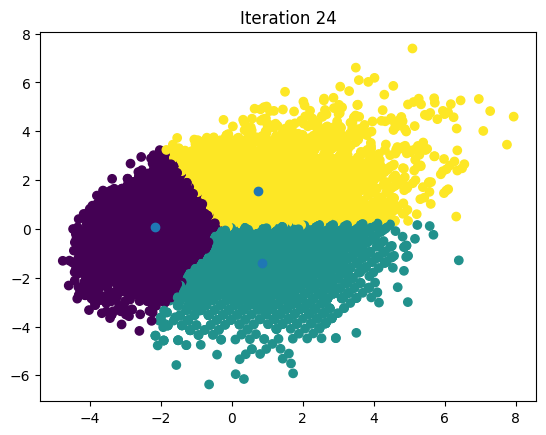

In [19]:
max_iterations = 100
k = 3

centroids = random_cenroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroid(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    

In [20]:
centroids

,0,1,2
overall,3.206838,4.784633,5.806043
potential,4.928473,4.506962,6.497993
wage_eur,1.028505,1.118904,1.420001
value_eur,1.026614,1.044980,1.285501
age,2.518708,5.472247,3.596161


In [21]:
players[labels == 2][['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(3)
kmeans.fit(data)

D:\Practice\practice\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[4.80551944, 4.50819467, 1.11374023, 1.04022793, 5.61034361],
       [3.59841755, 5.2037346 , 1.03986261, 1.03571975, 2.71312457],
       [6.229996  , 6.62657388, 1.65729587, 1.41436199, 4.1324697 ]])

In [25]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.805519,3.598418,6.229996
potential,4.508195,5.203735,6.626574
wage_eur,1.113740,1.039863,1.657296
value_eur,1.040228,1.035720,1.414362
age,5.610344,2.713125,4.132470


In [26]:
type(features)

list